In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


In [2]:
df = pd.read_excel('WMT.xlsx', sheet_name=0,index_col="Date",parse_dates=True)


df['log_ret']=np.log(df["Adj Price"]).diff()  
df.head()


,Adj Price,log_ret
Date,,
2022-02-01,46.403332,NaN
2022-02-02,47.000000,0.012776
2022-02-03,46.753334,-0.005262
2022-02-04,46.963333,0.004482
2022-02-07,46.686668,-0.005909


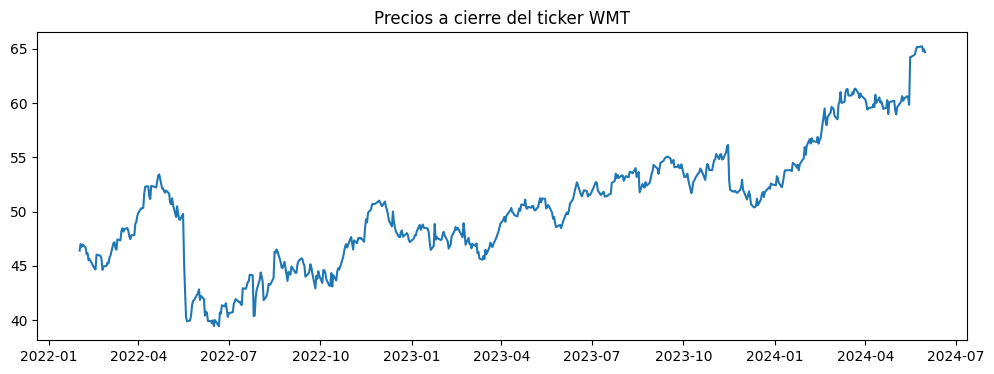

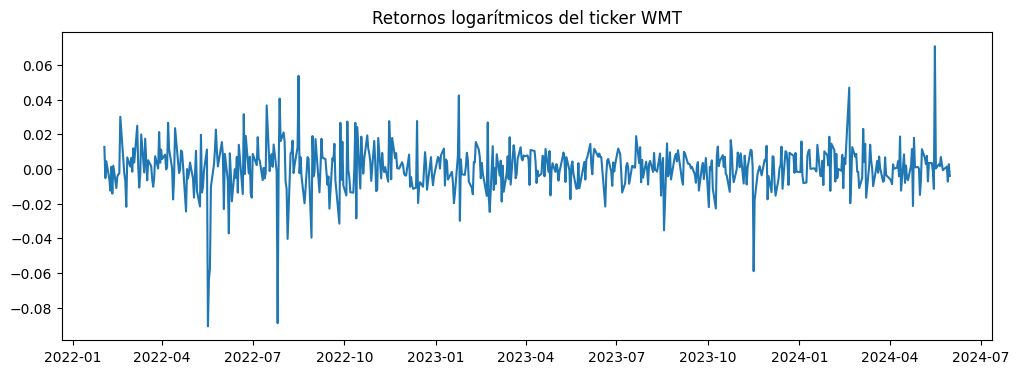

In [3]:
plt.figure(figsize=(12,4))
plt.plot(df['Adj Price'])
plt.title("Precios a cierre del ticker WMT")
plt.show()

plt.figure(figsize=(12,4))
plt.title("Retornos logarítmicos del ticker WMT")
plt.plot(df['log_ret'])            
plt.show()



In [4]:
cant_log_ret=df['log_ret'].count()
print(cant_log_ret)
np.random.seed(42)
print(np.random.choice(df['log_ret']))
print(np.random.choice(df['log_ret']))


#Econtrar un valor dentro del array
#print(np.where(df['log_ret'].values==0.010845546556103702)[0][0])



585
-0.014300385199737864
0.010845546556103702


In [5]:
# Lo que quiero obtener son 1000 meses de sumas de retornos logaritmicos aleatorios, asumiendo que los meses tienen 20 dias

np.random.seed(42) #Inicializo la semilla para que todas las simulaciones sean iguales
month_days_count=20
day_of_month=[str(i+1) for i in range(month_days_count)]
simulation_count=1000
month_acumulative_simulations=[]
columns_names=day_of_month
columns_names.append('acumulative_month_log')

retornos_log_diarios=df['log_ret'].dropna()


for i in range (simulation_count): 
    month_simulation_by_day=[np.random.choice(retornos_log_diarios) for i in range(month_days_count)]
    month_simulation_by_day.append(np.sum(month_simulation_by_day))
    month_acumulative_simulations.append(month_simulation_by_day)

df_simulaciones=pd.DataFrame(month_acumulative_simulations,columns=columns_names)
display(df_simulaciones.head())

display(df_simulaciones['1'].describe())


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,acumulative_month_log
0,-0.016491,-0.002762,-0.008686,0.005688,0.011242,0.011944,0.040650,-0.005674,-0.008944,-0.008066,...,0.009114,-0.004947,-0.002501,0.016364,-0.015184,0.006967,-0.001364,0.003504,0.002129,0.046360
1,0.017902,-0.013123,-0.006444,-0.017472,0.000594,0.003781,-0.007297,0.000999,-0.009179,-0.005386,...,0.009372,-0.012741,0.000332,0.006353,0.007575,-0.007202,0.016364,-0.007755,0.011944,-0.022406
2,-0.009483,0.004828,-0.035360,-0.001662,-0.002392,-0.019679,-0.021613,-0.006258,0.011701,-0.005107,...,0.001671,0.008005,-0.000945,-0.010217,0.000263,0.001515,0.001164,-0.035360,-0.005262,-0.123353
3,-0.004196,0.011471,0.018404,0.007690,0.009094,-0.006372,-0.012713,0.017932,0.000425,-0.008686,...,-0.013346,0.005207,0.011015,-0.003011,-0.000511,-0.010703,0.016219,0.009298,0.013987,0.057538
4,0.011219,-0.022843,-0.006627,0.010534,-0.001681,0.006967,0.009042,0.010291,-0.016461,-0.019774,...,0.009659,0.001253,0.006005,-0.001629,0.000434,0.006969,0.011219,-0.001970,0.053759,0.074308


count    1000.000000
mean        0.000624
std         0.014500
min        -0.090682
25%        -0.005445
50%         0.001462
75%         0.007396
max         0.070807
Name: 1, dtype: float64

### 9

In [6]:
quantils=[0.01,0.025,0.05,0.25,0.5,0.975]
print(f"Retorno logatimico diario promedio: {retornos_log_diarios.mean():0.4f}")
for _,value in enumerate(quantils):
    print(f"El percentil {value*100}% es {retornos_log_diarios.quantile(value):0.4f}")
print(f"Volatilidad diaria {retornos_log_diarios.std():0.4f}")


Retorno logatimico diario promedio: 0.0006
El percentil 1.0% es -0.0397
El percentil 2.5% es -0.0229
El percentil 5.0% es -0.0175
El percentil 25.0% es -0.0058
El percentil 50.0% es 0.0011
El percentil 97.5% es 0.0257
Volatilidad diaria 0.0135


### 10

In [ ]:
quantils=[0.01,0.025,0.05,0.5,0.975]
month_log_returns=df_simulaciones['acumulative_month_log']
for _,value in enumerate(quantils):
    print(f"Percentil {value*100}% es {month_log_returns.quantile(value):0.4f}")
print(f"Volatilidad mensual simulada: {month_log_returns.std():0.4f}")

print(month_log_returns)


Percentil 1.0% es -0.1447
Percentil 2.5% es -0.1097
Percentil 5.0% es -0.0931
Percentil 50.0% es 0.0133
Percentil 97.5% es 0.1334
Volatilidad mensual: 0.0604
0      0.046360
1     -0.022406
2     -0.123353
3      0.057538
4      0.074308
         ...   
995   -0.011312
996    0.051685
997   -0.027829
998    0.028463
999    0.143779
Name: acumulative_month_log, Length: 1000, dtype: float64


### 11 validamos que la volatilidad mensual es aproximadamente $$\sqrt(n)* \sigma_{diario}$$

In [16]:
daily_volatility=np.sqrt(month_days_count)*retornos_log_diarios.std()
np.isclose(daily_volatility,month_log_returns.std(),atol=1e-3)
print(daily_volatility)
print(month_log_returns.std())



0.060219570676017
0.06035412798698381
